In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
state0 = xr.open_dataset('/Users/weiyangbao/Desktop/sill12/state_007.nc')
state = state0.isel(Y = range(1,10)) # Remove the boundary walls in y direction
Qsg = 700

In [13]:
t = np.array([20, 60, 120]) #Time

z = np.array([12, 16]) #Depth layer

X = state.X.data / 1000
Y = state.Y.data
pt = state.Temp.data[:,z[0],:,:]
s = state.S.data[:,z[0],:,:]

u0 = state.U.data
ux = (u0[:, :, :, 1:] + u0[:, :, :, :-1]) / 2 #Convert Xp1(grid corner) to X(grid center)
u1 = ux[:,z[0],:,:] #dims=T,Y,X
u2 = ux[:,z[1],:,:]

v0 = state.V.data
vy = (v0[:, :, 1:, :] + v0[:, :, :-1, :]) / 2 #Convert Yp1(grid corner) to Y(grid center)
v1 = vy[:,z[0],1:10,:]
v2 = vy[:,z[1],1:10,:]
state.Z.data[z[0]]

-7.5

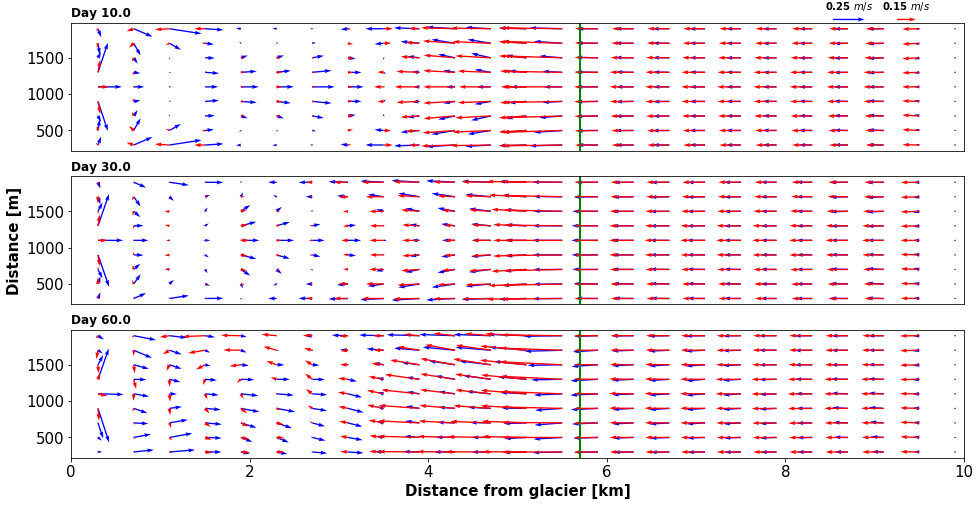

In [14]:
u1[:,:,::2] = np.nan
v1[:,:,::2] = np.nan
u2[:,:,::2] = np.nan
v2[:,:,::2] = np.nan

fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Sill012/PlaneView/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/Along_fjord_animation_Qf0200/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig = plt.figure(figsize=(16,8))
# Plot time 1 velocity field
ax1 = fig.add_subplot(311)
Q_11 = ax1.quiver(X,Y,u1[t[0],:,:], v1[t[0],:,:],scale=7, width=0.0015, color='b')
Q_12 = ax1.quiver(X,Y,u2[t[0],:,:], v2[t[0],:,:],scale=7, width=0.0015, color='r')
ax1.set_xlim([0,10])
ax1.axvline(x=X[28],color='g',linewidth=2)
plt.yticks(fontsize = 15)
ax1.quiverkey(Q_11, 0.8, 0.886, 0.25,r'0.25 $m/s$', fontproperties={'weight': 'bold', 'size' : 10}, coordinates='figure')
ax1.quiverkey(Q_12, 0.85, 0.886, 0.15,r'0.15 $m/s$', fontproperties={'weight': 'bold', 'size' : 10}, coordinates='figure')
ax1.set_title('Day ' + str(format(t[0]/2,'.1f')), loc='left', weight='bold')
ax1.axes.get_xaxis().set_visible(False)

# Plot time 2 velocity field
ax2 = fig.add_subplot(312)
Q_21 = ax2.quiver(X,Y,u1[t[1],:,:], v1[t[1],:,:],scale=7, width=0.0015, color='b')
Q_22 = ax2.quiver(X,Y,u2[t[1],:,:], v2[t[1],:,:],scale=7, width=0.0015, color='r')
ax2.set_xlim([0,10])
ax2.axvline(x=X[28],color='g',linewidth=2)
plt.yticks(fontsize = 15)
ax2.set_ylabel('Distance [m]', size = 15, weight = 'bold')
ax2.set_title('Day ' + str(format(t[1]/2,'.1f')), loc='left', weight='bold')
ax2.axes.get_xaxis().set_visible(False)



# Plot time 3 velocity field
ax3 = fig.add_subplot(313)
Q_31 = ax3.quiver(X,Y,u1[t[2],:,:], v1[t[2],:,:],scale=7, width=0.0015, color='b')
Q_32 = ax3.quiver(X,Y,u2[t[2],:,:], v2[t[2],:,:],scale=7, width=0.0015, color='r')
ax3.set_xlim([0,10])
ax3.axvline(x=X[28],color='g',linewidth=2)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax3.set_title('Day ' + str(format(t[2]/2,'.1f')), loc='left', weight='bold')
ax3.set_xlabel('Distance from glacier [km]', size = 15, weight = 'bold')

#plt.close()
fig.savefig(fig_path + 'Qsg' + str(Qsg) + '.png', dpi = 150, bbox_inches='tight')